In [2]:
import numpy as np
import pandas as pd
import torch

In [2]:
# class encoder(torch.nn.Module):
#     """
#     Initialize an RNN encoder:
#     x_len: The length of an input sequence. Each ECG example has length 5000.
#     x_dim: The dimension of the input sequence at each time step. At each time step 
#         we have 12 numbers (one for each lead), so this is 12.
#     h_dim: The number of hidden units in the RNN.
#     n_lyr: The number of layers to use in the RNN. 
#     """
#     def __init__(self, x_len, x_dim, h_dim, n_lyr):
#         super().__init__()
#         # self.bn = torch.nn.BatchNorm1d(x_dim)
#         self.rnn = torch.nn.RNN(x_dim, h_dim, n_lyr)
    
#     """
#     Compute the forward pass. 
#     x: Input tensor of size (x_len, N, x_dim), where N is the number of examples in the batch.
    
#     Returns z, a tensor of size (x_len, N, h_dim), containing the hidden states computed at each time step.
#     """
#     def forward(self, x):
#         # x = self.bn(torch.permute(x, (1, 2, 0))) # (L, N, C) -> (N, C, L)
#         # x = torch.permute(x, (2, 0, 1)) # (N, C, L) -> (L, N, C)
#         z, _ = self.rnn(x)
#         return z

# class decoder(torch.nn.Module):
    
#     def __init__(self, x_len, x_dim, h_dim, n_lyr):
#         super().__init__()
#         # self.bn = torch.nn.BatchNorm1d(h_dim)
#         self.rnn = torch.nn.RNN(h_dim, x_dim, n_lyr)
        
#     def forward(self, z):
#         # z = self.bn(torch.permute(z, (1, 2, 0))) # (L, N, C) -> (N, C, L)
#         # z = torch.permute(z, (2, 0, 1)) # (N, C, L) -> (L, N, C)
#         r, _ = self.rnn(z)
#         return r

In [3]:
# class encoder(torch.nn.Module):
    
#     """
#     Initialize an RNN encoder:
#     x_len: The length of an input sequence. Each ECG example has length 5000.
#     x_dim: The dimension of the input sequence at each time step. At each time step 
#         we have 12 numbers (one for each lead), so this is 12.
#     h_dim: The number of hidden units in the RNN. 
#     """
#     def __init__(self, x_len, x_dim, h_dim):
#         super().__init__()
#         self.x_len = x_len
#         self.x_dim = x_dim
#         self.h_dim = h_dim
#         #self.bn = torch.nn.BatchNorm1d(x_dim)
#         self.rnn_cell = torch.nn.RNNCell(x_dim, h_dim, nonlinearity="relu")
    
#     """
#     Compute the forward pass. 
#     x: Input tensor of size (x_len, N, x_dim), where N is the number of examples in the batch.
    
#     Returns a tensor of size (N, h_dim), containing the last hidden state.
#     """
#     def forward(self, x):
#         # Create a tensor to append the hidden states to: (1, batch_size, h_dim)
#         # The first dimension starts at 1 because we start with one null hidden state.
#         hx_s = torch.zeros((1, x.shape[1], self.h_dim))

#         for t in range(1, self.x_len):
#             hx = self.rnn_cell(x[t,:,:], hx_s[t-1,:,:])
#             hx = torch.reshape(hx, (1, x.shape[1], self.h_dim))
#             hx_s = torch.cat((hx_s, hx), 0)

#         return hx_s[-1,:,:]

# class decoder(torch.nn.Module):
    
#     """
#     Initialize an RNN decoder:
#     x_len: The length of an input sequence. Each ECG example has length 5000.
#     x_dim: The dimension of the input sequence at each time step. At each time step 
#         we have 12 numbers (one for each lead), so this is 12.
#     h_dim: The number of hidden units in the RNN. 
#     """
#     def __init__(self, x_len, x_dim, h_dim):
#         super().__init__()
#         self.x_len = x_len
#         self.x_dim = x_dim
#         self.h_dim = h_dim
#         #self.bn = torch.nn.BatchNorm1d(h_dim)
#         self.rnn_cell = torch.nn.RNNCell(x_dim, h_dim, nonlinearity="relu")
#         self.linear = torch.nn.Linear(h_dim, x_dim)
        
#     def forward(self, hx):
#         batch_size = hx.shape[0]
        
#         # Create a tensor to append the hidden states to: (0, batch_size, h_dim)
#         hx_s = torch.zeros((0, batch_size, self.h_dim))

#         # Append the last hidden state of the encoder as our 0th hidden state.
#         hx = torch.reshape(hx, (1, batch_size, self.h_dim))
#         hx_s = torch.cat((hx_s, hx), 0)

#         # Create a tensor to store the decoder outputs.
#         outputs = torch.ones((1, batch_size, self.x_dim))
        
#         for t in range(1, self.x_len+1):
#             # Get the next hidden state from the decoder.
#             hx = self.rnn_cell(outputs[t-1,:,:], hx_s[t-1,:,:])
#             hx = torch.reshape(hx, (1, batch_size, self.h_dim))
#             hx_s = torch.cat((hx_s, hx), 0)
  
#             # Get the next output by applying a linear layer. 
#             out = self.linear(hx_s[t,:,:])
#             out = torch.reshape(out, (1, batch_size, self.x_dim))
#             outputs = torch.cat((outputs, out), 0)
        
#         # print("hx_s: ", hx_s)
        
#         return outputs[1:self.x_len+1,:,:]
    
# class autoencoder(torch.nn.Module):
    
#     def __init__(self, x_len = 5000, x_dim = 12, h_dim = 6):
#         super().__init__()
#         self.enc = encoder(x_len, x_dim, h_dim)
#         self.dec = decoder(x_len, x_dim, h_dim)
    
#     def forward(self, x):
#         hx = self.enc(x)
#         r = self.dec(hx)
#         return r

In [150]:
# class encoder(torch.nn.Module):
    
#     """
#     Initialize an RNN encoder:
#     x_len: The length of an input sequence. Each ECG example has length 5000.
#     x_dim: The dimension of the input sequence at each time step. At each time step 
#         we have 12 numbers (one for each lead), so this is 12.
#     h_dim: The number of hidden units in the RNN. 
#     """
#     def __init__(self, x_len, x_dim, h_dim, n_lyr):
#         super().__init__()
#         self.x_len = x_len
#         self.x_dim = x_dim
#         self.h_dim = h_dim
#         self.n_lyr = n_lyr
        
#         # add RNN layers. First layer takes x_dim input vectors. Remaining layers
#         # take hidden states as input.
#         self.rnn_cells = [torch.nn.RNNCell(x_dim, h_dim, nonlinearity="relu")]
#         for _ in range(n_lyr-1):
#             cell = torch.nn.RNNCell(h_dim, h_dim, nonlinearity="relu")
#             self.rnn_cells.append(cell)
    
#     """
#     x_t: Input at some time-step of shape (batch_size, x_dim).
#     hx_s: Hidden states at previous time-step of shape (n_lyr, batch_size, h_dim).
    
#     returns hx_s_t: a tensor containing the next hidden states for each layer of shape (n_lyr, batch_size, h_dim).
#     """
#     def rnn_forward(self, x_t, hx_s):
        
#         batch_size = x_t.shape[0]
        
#         hx_s_t = torch.zeros((0, batch_size, self.h_dim)) # hidden states
#         in_s_t = torch.zeros((0, batch_size, self.h_dim)) # layer inputs
        
#         # Pass x_t through the first RNN layer.
#         hx_t = self.rnn_cells[0](x_t, hx_s[0,:,:])
#         hx_t = torch.reshape(hx_t, (1, batch_size, self.h_dim))
#         hx_s_t = torch.cat((hx_s_t, hx_t)) # store the hidden state
#         in_s_t = torch.cat((in_s_t, hx_t)) # store also as an input to the next layer.
        
#         # Propagate up through the remaining RNN layers.
#         for i in range(1, self.n_lyr):
#             hx_t = self.rnn_cells[i](in_s_t[i-1,:,:], hx_s[i,:,:])
#             hx_t = torch.reshape(hx_t, (1, batch_size, self.h_dim))
#             hx_s_t = torch.cat((hx_s_t, hx_t)) # store the hidden state
#             in_s_t = torch.cat((in_s_t, hx_t)) # store also as an input to the next layer.
            
#         return hx_s_t
    
#     """
#     Compute the forward pass. 
#     x: Input tensor of size (x_len, N, x_dim), where N is the number of examples in the batch.
    
#     Returns a tensor of size (N, h_dim), containing the last hidden state of the last layer.
#     """
#     def forward(self, x):
#         batch_size = x.shape[1]
#         hx_s = torch.zeros((self.n_lyr, batch_size, self.h_dim))
#         for t in range(0, self.x_len):
#             hx_s = self.rnn_forward(x[t,:,:], hx_s)
#         #return hx_s[-1,:,:]
#         return hx_s

# class decoder(torch.nn.Module):
    
#     """
#     Initialize an RNN decoder:
#     x_len: The length of an input sequence. Each ECG example has length 5000.
#     x_dim: The dimension of the input sequence at each time step. At each time step 
#         we have 12 numbers (one for each lead), so this is 12.
#     h_dim: The number of hidden units in the RNN. 
#     """
#     def __init__(self, x_len, x_dim, h_dim, n_lyr):
#         super().__init__()
#         self.x_len = x_len
#         self.x_dim = x_dim
#         self.h_dim = h_dim
#         self.n_lyr = n_lyr
        
#         # add RNN layers. First layer takes x_dim input vectors. Remaining layers
#         # take hidden states as input.
#         self.rnn_cells = [torch.nn.RNNCell(x_dim, h_dim, nonlinearity="relu")]
#         for _ in range(n_lyr-1):
#             cell = torch.nn.RNNCell(h_dim, h_dim, nonlinearity="relu")
#             self.rnn_cells.append(cell)
            
#         # Linear layer to compute RNN outputs.
#         self.linear = torch.nn.Linear(h_dim, x_dim)
    
#     """
#     x_t: Input at some time-step of shape (batch_size, x_dim).
#     hx_s: Hidden states at previous time-step of shape (n_lyr, batch_size, h_dim).
    
#     returns hx_s_t: a tensor containing the next hidden states for each layer of shape (n_lyr, batch_size, h_dim).
#     """
#     def rnn_forward(self, x_t, hx_s):
        
#         batch_size = x_t.shape[0]
        
#         hx_s_t = torch.zeros((0, batch_size, self.h_dim)) # hidden states
#         in_s_t = torch.zeros((0, batch_size, self.h_dim)) # layer inputs
        
#         # Pass x_t through the first RNN layer.
#         hx_t = self.rnn_cells[0](x_t, hx_s[0,:,:])
#         hx_t = torch.reshape(hx_t, (1, batch_size, self.h_dim))
#         hx_s_t = torch.cat((hx_s_t, hx_t)) # store the hidden state
#         in_s_t = torch.cat((in_s_t, hx_t)) # store also as an input to the next layer.
        
#         # Propagate up through the remaining RNN layers.
#         for i in range(1, self.n_lyr):
#             hx_t = self.rnn_cells[i](in_s_t[i-1,:,:], hx_s[i,:,:])
#             hx_t = torch.reshape(hx_t, (1, batch_size, self.h_dim))
#             hx_s_t = torch.cat((hx_s_t, hx_t)) # store the hidden state
#             in_s_t = torch.cat((in_s_t, hx_t)) # store also as an input to the next layer.
            
#         return hx_s_t

#     def forward(self, hx):
        
#         #batch_size = hx.shape[0]
#         batch_size = hx.shape[1]
        
#         # store the outputs.
#         outputs = torch.zeros((0, batch_size, self.x_dim)) 
        
#         # initialize the hidden states for each layer.
#         #hx_s = torch.zeros((self.n_lyr-1, batch_size, self.h_dim))
#         hx_s = hx
        
#         # prepend hx as our 0th hidden state to the first layer.
#         #hx = torch.reshape(hx, (1, batch_size, self.h_dim))
#         #hx_s = torch.cat((hx, hx_s), 0) 
        
#         # first input is zeros.
#         x_t = torch.zeros((batch_size, x_dim)) 
        
#         for t in range(0, self.x_len):
#             # get next hidden states.
#             hx_s = self.rnn_forward(x_t, hx_s)
            
#             # pass the hidden state of the last RNN layer through 
#             # a linear layer to get the output.
#             y_t = self.linear(hx_s[-1,:,:])
#             out = torch.reshape(y_t, (1, batch_size, self.x_dim))
#             outputs = torch.cat((outputs, out), 0)
            
#             # the current output is the next input.
#             x_t = y_t
            
#         return outputs

# class autoencoder(torch.nn.Module):
    
#     def __init__(self, x_len = 5000, x_dim = 12, h_dim = 6, n_lyr = 1):
#         super().__init__()
#         self.enc = encoder(x_len, x_dim, h_dim, n_lyr)
#         self.dec = decoder(x_len, x_dim, h_dim, n_lyr)
    
#     def forward(self, x):
#         hx = self.enc(x)
#         r = self.dec(hx)
#         return r

In [3]:
class Encoder(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.cnn = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, 3, stride=(1,2), padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, 3, stride=(1,2), padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 64, 7),
        )
    
    def forward(self, X):
        X = self.cnn(X)
        return X
        
class Decoder(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.cnn = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(64, 32, 7),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(32, 16, 3, stride=(1,2), padding=(1,1)),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(16, 1, 3, stride=(1,2), padding=(1,1))
        )
    
        self.pad = torch.nn.ZeroPad2d((0, 3, 0, 0)) # Pad to the proper size.
    
    def forward(self, X):
        X = self.cnn(X)
        X = self.pad(X)
        return X
    
class AutoEncoder(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.enc = Encoder()
        self.dec = Decoder()
        
    def forward(self, X):
        X = self.enc.forward(X)
        X = self.dec.forward(X)
        return X
    


In [229]:
X_0 = torch.randn(15, 1, 12, 5000)
ae = AutoEncoder()
X_1 = ae.forward(X_0)
X_1.shape

torch.Size([15, 1, 12, 5000])

In [167]:
conv_1 = torch.nn.Conv2d(1, 16, 3, stride=(1,2), padding=1)
conv_2 = torch.nn.Conv2d(16, 32, 3, stride=(1,2), padding=1)
conv_3 = torch.nn.Conv2d(32, 64, 7)
conv_4 = torch.nn.ConvTranspose2d(64, 32, 7)
conv_5 = torch.nn.ConvTranspose2d(32, 16, 3, stride=(1,2), padding=(1,1))
conv_6 = torch.nn.ConvTranspose2d(16, 1, 3, stride=(1,2), padding=(1,1))

X = torch.randn(15, 1, 12, 50)
print(X.shape)
X = conv_1(X)
print(X.shape)
X = conv_2(X)
print(X.shape)
X = conv_3(X)
print(X.shape)
X = conv_4(X)
print(X.shape)
X = conv_5(X)
print(X.shape)
X = conv_6(X)
print(X.shape)

torch.Size([15, 1, 12, 50])
torch.Size([15, 16, 12, 25])
torch.Size([15, 32, 12, 13])
torch.Size([15, 64, 6, 7])
torch.Size([15, 32, 12, 13])
torch.Size([15, 16, 12, 25])
torch.Size([15, 1, 12, 49])


In [24]:
from pathlib import Path
from tqdm import tqdm

def load_data(n = -1):
    data = pd.read_excel("data/Diagnostics.xlsx")
    num_examples = data.shape[0] if n == -1 else n
    
    X = np.zeros((5000, num_examples, 12))
    
    print("Loading", num_examples, "Examples.")
    for i, file in tqdm(enumerate((Path.cwd() / "data/ECGData/").glob("*.csv")), total = num_examples):
        fname = file.name
        X[:, i, :] = pd.read_csv(file).to_numpy()
        if i >= num_examples - 1:
            break
    print("Done!")
    
    X = torch.from_numpy(X).type(torch.FloatTensor)
    
    return X

import matplotlib.pyplot as plt

def plot_ecg(o, r, X_LEN, n_leads = 12):
    fig, axs = plt.subplots(n_leads, figsize=(8, 8))
    plt.xlabel("Seconds")
    plt.ylabel("Microvolts")
    plt.xlim([0, 10])
    
    x = np.linspace(0, 10, X_LEN) # 500Hz
    for i in range(n_leads):
        axs[i].plot(x, o[i,:].numpy(), color='black')
        axs[i].plot(x, r[i,:].numpy(), color='blue')
    
    plt.show()
    

In [94]:
data = pd.read_excel("data/Diagnostics.xlsx")
data.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [36]:
X = load_data(1000)

X_DIM = 12
X_LEN = 5000
N_EX = 1000
B_SZ = 25

# Shrink the data in accordance with above.
X = X[0:X_LEN,0:N_EX,0:X_DIM]

def reshape_for_cnn(X):
    """
    Reshapes the data from (X_LEN, B_SZ, X_DIM) (e.g. (5000, 10, 12))
    to (B_SZ, 1, X_DIM, X_LEN), because we have 1 channel.
    """
    X_LEN, B_SZ, X_DIM = X.shape
    X = torch.permute(X, (1, 2, 0))
    X = torch.reshape(X, (B_SZ, 1, X_DIM, X_LEN))
    return X

X = reshape_for_cnn(X)

ae = AutoEncoder()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr = 1e-3, weight_decay = 1e-8)

# Place on GPU
# mps_device = torch.device("mps")
# X.to(mps_device)
# ae.to(mps_device)

### Train
N_EPOCHS = 10
print("Starting training...")
for e_i in range(N_EPOCHS):
    
    # shuffle the indices
    idx = np.arange(N_EX)
    np.random.shuffle(idx)
    
    # iterate over batches
    epoch_loss = 0.0
    num_batches = N_EX // B_SZ
    for b_i in range(num_batches):
        
        # Make batch
        X_batch = X[idx[b_i * B_SZ : (b_i + 1) * B_SZ],:,:,:]
  
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward Pass
        r = ae.forward(X_batch)

        # Compute MSE loss
        loss = criterion(r, X_batch)

        # Update parameters
        loss.backward()
        optimizer.step()
        
        print(loss.item())
        
    print("Epoch #{0} Loss:{1}".format(e_i + 1, loss.item()))

Loading 1000 Examples.


100%|██████████████████████████████████████▉| 999/1000 [00:04<00:00, 238.87it/s]


Done!
Starting training...
49306.5234375
55480.77734375
52263.1953125
36134.984375
23556.298828125
28521.09765625
25124.025390625
14732.6650390625
16215.3271484375
16202.642578125
16183.685546875
9925.484375
12781.2919921875
11768.279296875
12815.37109375
9913.09765625
7902.8505859375
6921.54638671875
8522.0625
7788.69287109375
6596.89892578125
11013.9541015625
6142.53515625
5556.28662109375
6637.5791015625
4615.38525390625
9699.3037109375
6324.265625
4296.31982421875
5535.18603515625
4033.3759765625
4533.1982421875
3635.72021484375
3446.8857421875
3297.278564453125
3510.5576171875
4791.20849609375
4319.66943359375
3353.502685546875
4137.92626953125
Epoch #0 Loss:4137.92626953125
4684.62548828125
3008.00537109375
3121.521240234375
2445.636962890625
2099.988525390625
2430.595458984375
2328.45751953125
2282.632080078125
2353.91259765625
2398.671142578125
2792.90625
2478.178955078125
2768.4169921875
2261.48681640625
2113.579345703125
2045.1597900390625
2014.6478271484375
1963.306640625
29

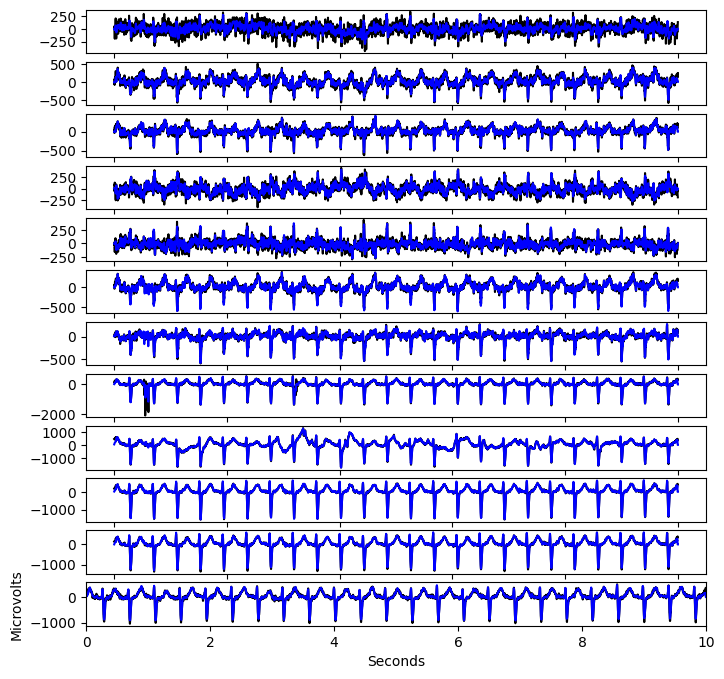

In [41]:
with torch.no_grad():
    i = 440
    o = X[i:i+1, :, :, :]
    r = ae.forward(o)
    plot_ecg(o[0, 0, :, :], r[0, 0, :, :], X_LEN)

In [89]:
np.arange(N_EX)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])